In [15]:
import numpy as np
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from scipy import stats as stats
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [16]:
import scipy
import scipy.stats
import numpy as np

def sample_class(mean, cov, size):

    class1 = scipy.stats.multivariate_normal(mean, cov)
    
    return class1.rvs(size=size)



SENARYO-1

In [30]:
cov=[[100, 0, 0], [0, 100, 0],[0, 0, 100]]

C1 = sample_class([-8, -14, 28], cov, 100) 
C2 = sample_class([53, 10, 12], cov, 100)
C3 = sample_class([11, 27, 16], cov, 100)

X1 = np.hstack([C1[:,0],C2[:,0], C3[:,0]])
X2 = np.hstack([C1[:,1],C2[:,1], C3[:,1]])
X3 = np.hstack([C1[:,2],C2[:,2], C3[:,2]])

y = np.hstack([np.zeros(C1.shape[0]),np.ones(C2.shape[0]),2*np.ones(C3.shape[0])])
print(y)

X = np.vstack(
(
    np.ones_like(X1),
    X1,
    X2,
    X3
)).T


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [34]:
import sklearn.linear_model as lm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
y = label_binarize(y, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                   random_state=0)
LR = OneVsRestClassifier(lm.LogisticRegression(solver='newton-cg'))
y_score=LR.fit(X_train,y_train).decision_function(X_test)
print ('Parameter Scikit Learn ', LR)


Parameter Scikit Learn  OneVsRestClassifier(estimator=LogisticRegression(solver='newton-cg'))


In [35]:
print(y_score)

[[-10.4442198  -35.89150521   5.50433312]
 [-36.40172369  27.60973555  -7.08249699]
 [  4.1148154  -24.51849192  -1.01179546]
 [-15.80863809  -9.63493518  -0.77709295]
 [-23.85140836  -8.36939032   4.69667271]
 [-27.13932948  31.86260853 -11.09981495]
 [-12.81941082 -19.61708777   2.85454635]
 [-37.6230846  -11.18290988   9.24378394]
 [ 28.97451191 -24.07917906 -11.17027844]
 [-21.42453032   0.49511325  -2.32187957]
 [-25.93878901 -20.55779493   8.12725298]
 [ 38.38538749 -29.29516728 -12.85495806]
 [-27.80841869  27.70178872  -8.55190483]
 [-54.79575308  -4.45170132  11.15724969]
 [ 20.26371165 -52.86937525   0.5635429 ]
 [ 31.20658241 -27.71403996 -12.46649643]
 [-18.64748204 -11.2290986    0.19619363]
 [ 41.41138422 -45.58466578  -7.05045626]
 [-28.63079876 -20.98543144   5.05036414]
 [-45.29327105  46.17526843 -10.12656133]
 [-45.72951739  36.56274509  -9.11792721]
 [-40.02608587  32.04501574  -5.49241587]
 [-53.25683785  22.9786618    0.45718856]
 [-43.52809243  47.04157705 -11.84

In [36]:
print(y_test)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [37]:
import numpy as np
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from scipy import stats as stats
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Parameter Scikit Learn  OneVsRestClassifier(estimator=LogisticRegression(solver='newton-cg'))


LinAlgError: the leading minor of order 1 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.

<Figure size 432x288 with 0 Axes>

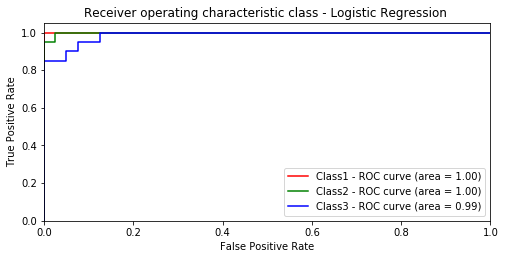

In [38]:
for i in range(1,4):
    if i==1:
        LR = OneVsRestClassifier(skl_lm.LogisticRegression(solver='newton-cg'))
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - Logistic Regression ')
        plt.legend(loc="lower right")
        
        
    elif i==2:
        LR = OneVsRestClassifier(LinearDiscriminantAnalysis(solver='eigen'))
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - LDA ')
        plt.legend(loc="lower right")
        
    else:
        LR = OneVsRestClassifier(QuadraticDiscriminantAnalysis())
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - QDA ')
        plt.legend(loc="lower right")

SENARYO-2

In [61]:
cov1=[[300, 0, 0], [0, 300, 0],[0, 0, 300]]
cov2=[[200, 0, 0], [0, 200, 0],[0, 0, 200]]
cov3=[[100, 0, 0], [0, 100, 0],[0, 0, 100]]

C1 = sample_class([-8, -14, 28], cov1, 100) 
C2 = sample_class([53, 10, 12], cov2, 100)
C3 = sample_class([11, 27, 16], cov3, 100)

X1 = np.hstack([C1[:,0],C2[:,0], C3[:,0]])
X2 = np.hstack([C1[:,1],C2[:,1], C3[:,1]])
X3 = np.hstack([C1[:,2],C2[:,2], C3[:,2]])

y = np.hstack([np.zeros(C1.shape[0]),np.ones(C2.shape[0]),2*np.ones(C3.shape[0])])
print(y)

X = np.vstack(
(
    np.ones_like(X1),
    X1,
    X2,
    X3
)).T


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [62]:
import sklearn.linear_model as lm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
y = label_binarize(y, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=0)
LR = OneVsRestClassifier(lm.LogisticRegression(solver='newton-cg'))
y_score=LR.fit(X_train,y_train).decision_function(X_test)
print ('Parameter Scikit Learn ', LR)

Parameter Scikit Learn  OneVsRestClassifier(estimator=LogisticRegression(solver='newton-cg'))


Parameter Scikit Learn  OneVsRestClassifier(estimator=LogisticRegression(solver='newton-cg'))


LinAlgError: the leading minor of order 1 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.

<Figure size 432x288 with 0 Axes>

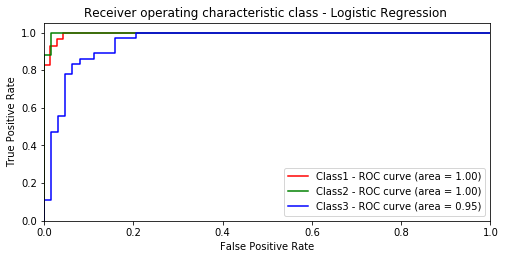

In [63]:
for i in range(1,4):
    if i==1:
        LR = OneVsRestClassifier(skl_lm.LogisticRegression(solver='newton-cg'))
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - Logistic Regression ')
        plt.legend(loc="lower right")
        
        
    elif i==2:
        LR = OneVsRestClassifier(LinearDiscriminantAnalysis(solver='eigen'))
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - LDA ')
        plt.legend(loc="lower right")
        
    else:
        LR = OneVsRestClassifier(QuadraticDiscriminantAnalysis())
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - QDA ')
        plt.legend(loc="lower right")

SENARYO-3

In [64]:
cov1=[[300, 0, 0], [0, 300, 0],[0, 0, 300]]
cov2=[[200, 0, 0], [0, 200, 0],[0, 0, 200]]
cov3=[[100, 0, 0], [0, 100, 0],[0, 0, 100]]

C1 = sample_class([-8, -14, 28], cov1, 100) 
C2 = sample_class([53, 10, 12], cov2, 500)
C3 = sample_class([11, 27, 16], cov3, 1000)

X1 = np.hstack([C1[:,0],C2[:,0], C3[:,0]])
X2 = np.hstack([C1[:,1],C2[:,1], C3[:,1]])
X3 = np.hstack([C1[:,2],C2[:,2], C3[:,2]])

y = np.hstack([np.zeros(C1.shape[0]),np.ones(C2.shape[0]),2*np.ones(C3.shape[0])])
print(y)

X = np.vstack(
(
    np.ones_like(X1),
    X1,
    X2,
    X3
)).T


[0. 0. 0. ... 2. 2. 2.]


In [65]:
import sklearn.linear_model as lm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
y = label_binarize(y, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=0)
LR = OneVsRestClassifier(lm.LogisticRegression(solver='newton-cg'))
y_score=LR.fit(X_train,y_train).decision_function(X_test)
print ('Parameter Scikit Learn ', LR)

Parameter Scikit Learn  OneVsRestClassifier(estimator=LogisticRegression(solver='newton-cg'))


In [27]:
for i in range(1,4):
    if i==1:
        LR = OneVsRestClassifier(skl_lm.LogisticRegression(solver='newton-cg'))
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - Logistic Regression ')
        plt.legend(loc="lower right")
        
        
    elif i==2:
        LR = OneVsRestClassifier(LinearDiscriminantAnalysis(solver='eigen'))
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - LDA ')
        plt.legend(loc="lower right")
        
    else:
        LR = OneVsRestClassifier(QuadraticDiscriminantAnalysis())
        y_score=LR.fit(X_train,y_train).decision_function(X_test)

        print ('Parameter Scikit Learn ', LR)

        # Compute ROC curve and ROC area for each class
        n_classes=3
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Plot of a ROC curve for each class
        plt.figure()
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        plt.plot(fpr[0], tpr[0], c="red" , label='Class1 - ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot(fpr[1], tpr[1], c="green", label='Class2 - ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot(fpr[2], tpr[2], c="blue", label='Class3 - ROC curve (area = %0.2f)' % roc_auc[2])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic class - QDA ')
        plt.legend(loc="lower right")

Parameter Scikit Learn  OneVsRestClassifier(estimator=LogisticRegression(solver='newton-cg'))


IndexError: too many indices for array

# SORULAR

# 1) Yukarıdaki senaryolarda hangi yöntemin diğerine göre üstün olduğunu belirleyiniz.


Senaryo 1 ve 2 de genel itibariyle Quadratic Diskriminant Analizi yöntemi diğerlerine göre daha doğru sonuç vermiştir. Sınıflara bağlı olarak da sonuç değişebilmektedir. Ancak Senaryo 3 te bütün yöntemler hemen hemen aynı sonuçlar elde edilmiştir. 

# 2) Birden çok sınıf bulunduğunda algoritmaların birbirine göre başarısını nasıl belirleyebilirsiniz? Literatür araştırması yaparak ROC eğrisinin birden çok sınıf bulunduğunda nasıl kullanılabileceğini özetleyin.

Ben ödevimde ROC curve çizdirirken aşağıdaki linkte de yer alan scikitlearn.org dan yardım aldım. sklearn.metrics.roc_auc_score fonksiyonu multiclass sorunları için kullanılabilmektedir.Bu fonksiyon her benzersiz çift kombinasyonunu karşılaştırır.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#:~:text=ROC%20curves%20typically%20feature%20true,rate%20on%20the%20X%20axis.&text=ROC%20curves%20are%20typically%20used,necessary%20to%20binarize%20the%20output.

# Soru : Hangi kosullarda Voronoi diyagrami ile elde edilen sinirlar LDA ile elde edilen sinirlarla ayni olur? Tartışın.

Veri dağılımı, verinin varyansı ve istatistiksel özellikleri LDA değerlerini ve diyagram sonuçlarını etkilyecektir. Varyans ne kadar küçük olursa (değerce eşit verilerde) diyagram ve LDA değerleri birbirine o kadar yaklaşacaktır.